In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# 데이터 불러오기

In [11]:
data = pd.read_csv('C:/Users/dahun/Downloads/Pokemon.csv')
data.head()
data.tail()

print(len(data.isnull().any()))#null값이 있는지 확인
data.isnull().any()

data['Type 2'].replace(np.nan,'0',inplace = True) # null값 채워주기
data['Type 2'].head(10) # Type 2 칼럼의 상위 열개 출력

print("Number of pokemon are : "+str(data['Name'].nunique())) # 포켓몬 종류
name = pd.DataFrame(data['Name'].unique().tolist(),columns=['Pokemon']) # 포켓몬 종류 DataFrame

npoke_total = data.copy()
print(npoke_total.columns) # 컬럼명 확인
npoke_total = pd.concat([npoke_total['Name'],data['Total']],axis=1)# 포켓몬 종류와 각각의 종류 별로 몇마리인지

13
Number of pokemon are : 800
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


* 유일한 값 확인 : dataframe.series.unique()
* 유일한 값 개수 확인 : dataframe.series.nunique()
* tolist() 함수를 이용해서 값과 컬럼을 리스트로 만들수 있다.
(https://velog.io/@dkwjd131/%EC%9E%91%EC%84%B1%EC%A4%91Python-%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84-values-columns-tolist-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0)


In [14]:
print("Number of pokemon are : "+str(data['Name'].nunique())) # 포켓몬 종류

Number of pokemon are : 800


In [17]:
type(data)

pandas.core.frame.DataFrame

In [12]:
name

,Pokemon
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,VenusaurMega Venusaur
4,Charmander
...,...
795,Diancie
796,DiancieMega Diancie
797,HoopaHoopa Confined
798,HoopaHoopa Unbound


In [13]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,0,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [18]:
npoke_total

,Name,Total
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,525
3,VenusaurMega Venusaur,625
4,Charmander,309
...,...,...
795,Diancie,600
796,DiancieMega Diancie,700
797,HoopaHoopa Confined,600
798,HoopaHoopa Unbound,680


# 분석 및 시각화

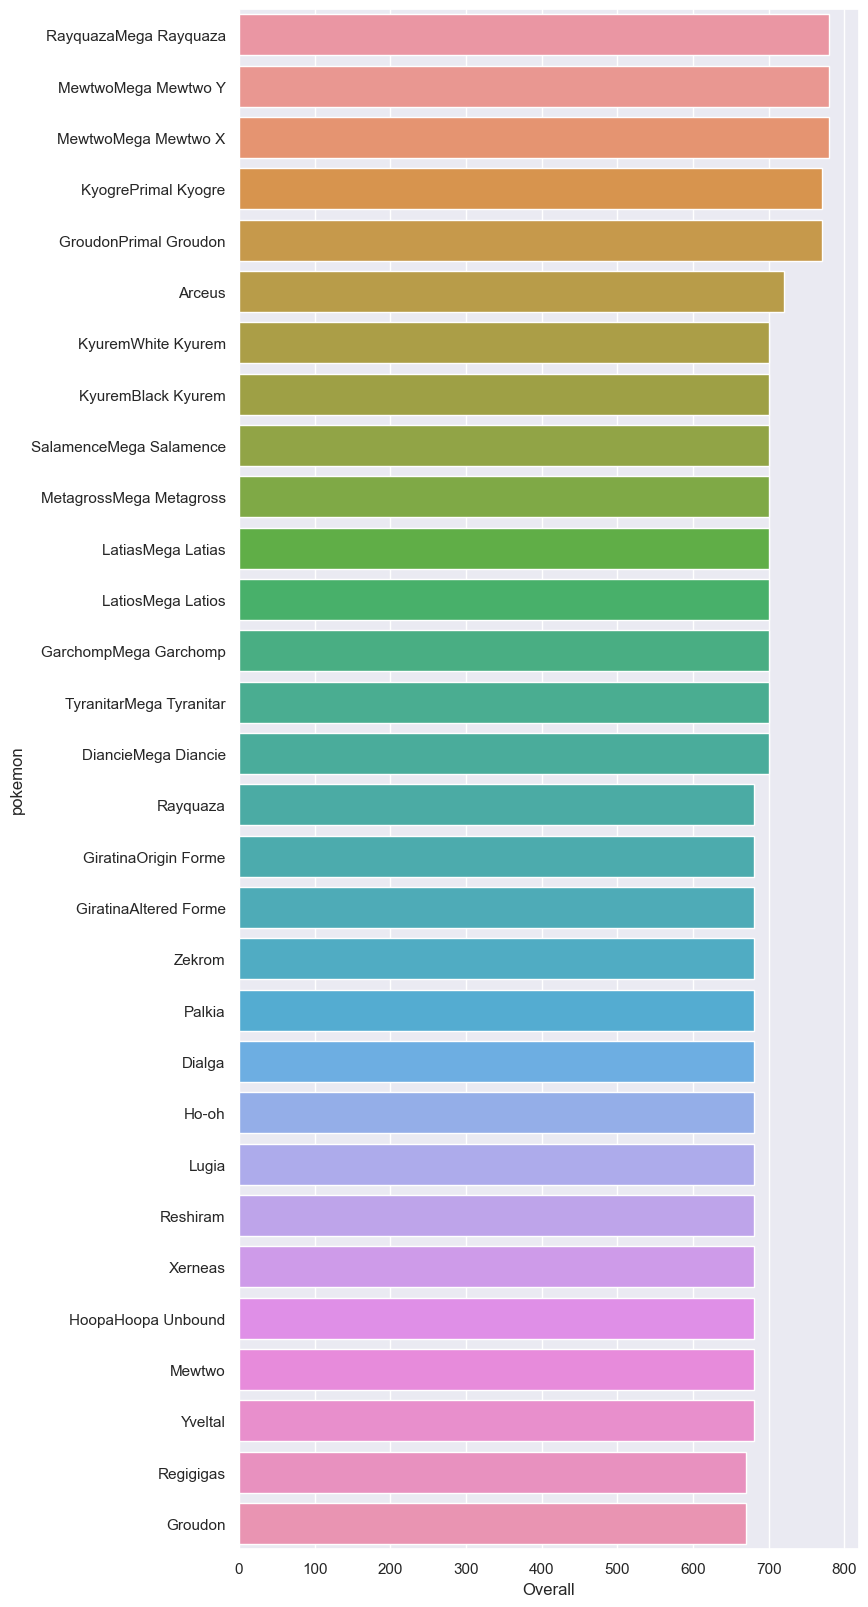

In [19]:
sns.set()
plt.figure(figsize=(8,20))
ax = sns.barplot(x='Total',y='Name',data = npoke_total.sort_values(by = 'Total',ascending=False).head(30))
ax.set(xlabel = 'Overall',ylabel='pokemon')
plt.show()

818
800
0.0


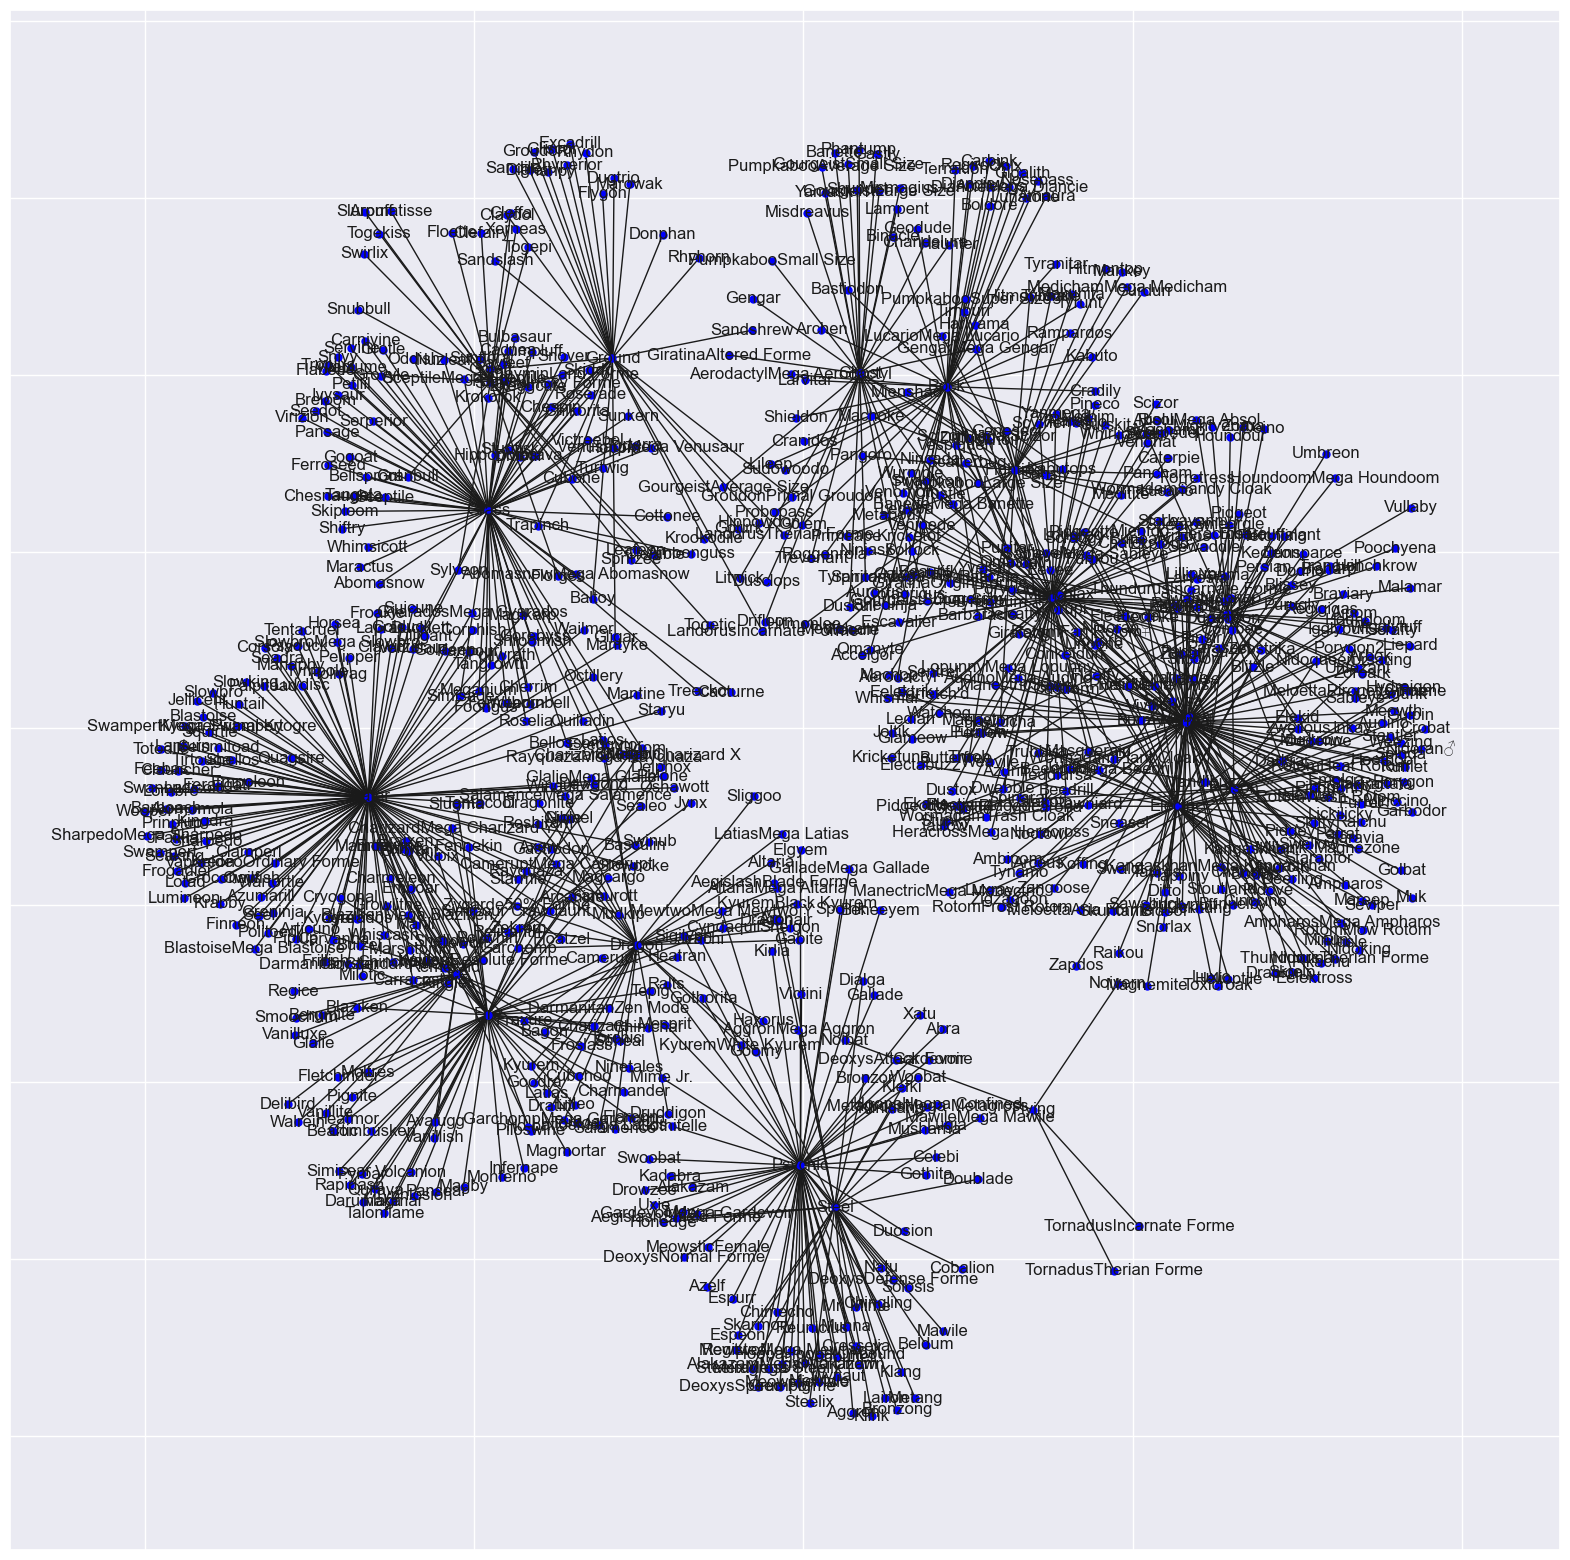

In [28]:
#Network analysis
g = nx.Graph()
g = nx.from_pandas_edgelist(data, source = 'Name', target = 'Type 1')
print(nx.number_of_nodes(g))  # 노드 개수 출력
print(nx.number_of_edges(g))  # 엣지 개수 출력
print(nx.average_clustering(g))  # 평균 군집 계수 출력

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g,pos, node_size = 25, node_color = 'blue')
plt.show()

In [27]:
!pip install scipy

  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)


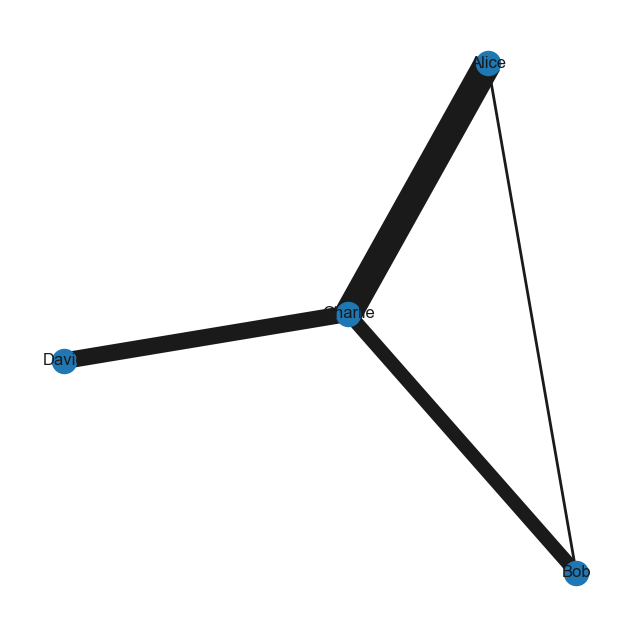

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# 호감도 데이터 예시
data = [
    ('Alice', 'Bob', 1),
    ('Alice', 'Charlie', 10),
    ('Bob', 'Charlie', 5),
    ('Charlie', 'David', 6)
]

# 그래프 생성
g = nx.Graph()

# 데이터를 기반으로 그래프에 노드와 엣지 추가
for node1, node2, score in data:
    if score > 0:
        g.add_edge(node1, node2, weight=score)

# 그래프 시각화
plt.figure(figsize=(8, 8))

# 호감도에 따라 선의 두께 설정
edge_widths = [2 * g[u][v]['weight'] for u, v in g.edges()]
pos = nx.spring_layout(g, seed=42)
nx.draw_networkx(g, pos, with_labels=True, width=edge_widths)

plt.axis('off')
plt.show()

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Users/dahun/Downloads/통합문서1.csv',index_col=0)

In [3]:
data

,1,2,3,4,5,6,7,8
1,NaN,10.0,5.0,6.0,4.0,8.0,0.0,0.0
2,NaN,NaN,5.0,0.0,0.0,4.0,10.0,1.0
3,NaN,NaN,NaN,0.0,0.0,5.0,7.0,2.0
4,NaN,NaN,NaN,NaN,0.0,6.0,5.0,3.0
5,NaN,NaN,NaN,NaN,NaN,1.0,2.0,4.0
6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(len(data.isnull().any()))#null값이 있는지 확인

8


In [5]:
for i in data.columns:
    print(i)

1
2
3
4
5
6
7
8


In [6]:
# for i in data.columns:
#     for j in data.index:
#         if data[i][j]=='NaN':
#             data[i][j]=0
    
data=data.fillna(0)

In [7]:
data.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [8]:
lista=[]
for i in data.columns:
    for j in data.index:
        tuplea=(int(i),j,data[i][j])
        lista.append(tuplea)
    

In [9]:
lista

[(1, 1, 0.0),
 (1, 2, 0.0),
 (1, 3, 0.0),
 (1, 4, 0.0),
 (1, 5, 0.0),
 (1, 6, 0.0),
 (1, 7, 0.0),
 (1, 8, 0.0),
 (2, 1, 10.0),
 (2, 2, 0.0),
 (2, 3, 0.0),
 (2, 4, 0.0),
 (2, 5, 0.0),
 (2, 6, 0.0),
 (2, 7, 0.0),
 (2, 8, 0.0),
 (3, 1, 5.0),
 (3, 2, 5.0),
 (3, 3, 0.0),
 (3, 4, 0.0),
 (3, 5, 0.0),
 (3, 6, 0.0),
 (3, 7, 0.0),
 (3, 8, 0.0),
 (4, 1, 6.0),
 (4, 2, 0.0),
 (4, 3, 0.0),
 (4, 4, 0.0),
 (4, 5, 0.0),
 (4, 6, 0.0),
 (4, 7, 0.0),
 (4, 8, 0.0),
 (5, 1, 4.0),
 (5, 2, 0.0),
 (5, 3, 0.0),
 (5, 4, 0.0),
 (5, 5, 0.0),
 (5, 6, 0.0),
 (5, 7, 0.0),
 (5, 8, 0.0),
 (6, 1, 8.0),
 (6, 2, 4.0),
 (6, 3, 5.0),
 (6, 4, 6.0),
 (6, 5, 1.0),
 (6, 6, 0.0),
 (6, 7, 0.0),
 (6, 8, 0.0),
 (7, 1, 0.0),
 (7, 2, 10.0),
 (7, 3, 7.0),
 (7, 4, 5.0),
 (7, 5, 2.0),
 (7, 6, 1.0),
 (7, 7, 0.0),
 (7, 8, 0.0),
 (8, 1, 0.0),
 (8, 2, 1.0),
 (8, 3, 2.0),
 (8, 4, 3.0),
 (8, 5, 4.0),
 (8, 6, 5.0),
 (8, 7, 6.0),
 (8, 8, 0.0)]

In [10]:
labels=[]
dic={}

for n1,n2,n3 in lista:
    if n3!=0:
        dic[(n1,n2)]=n3

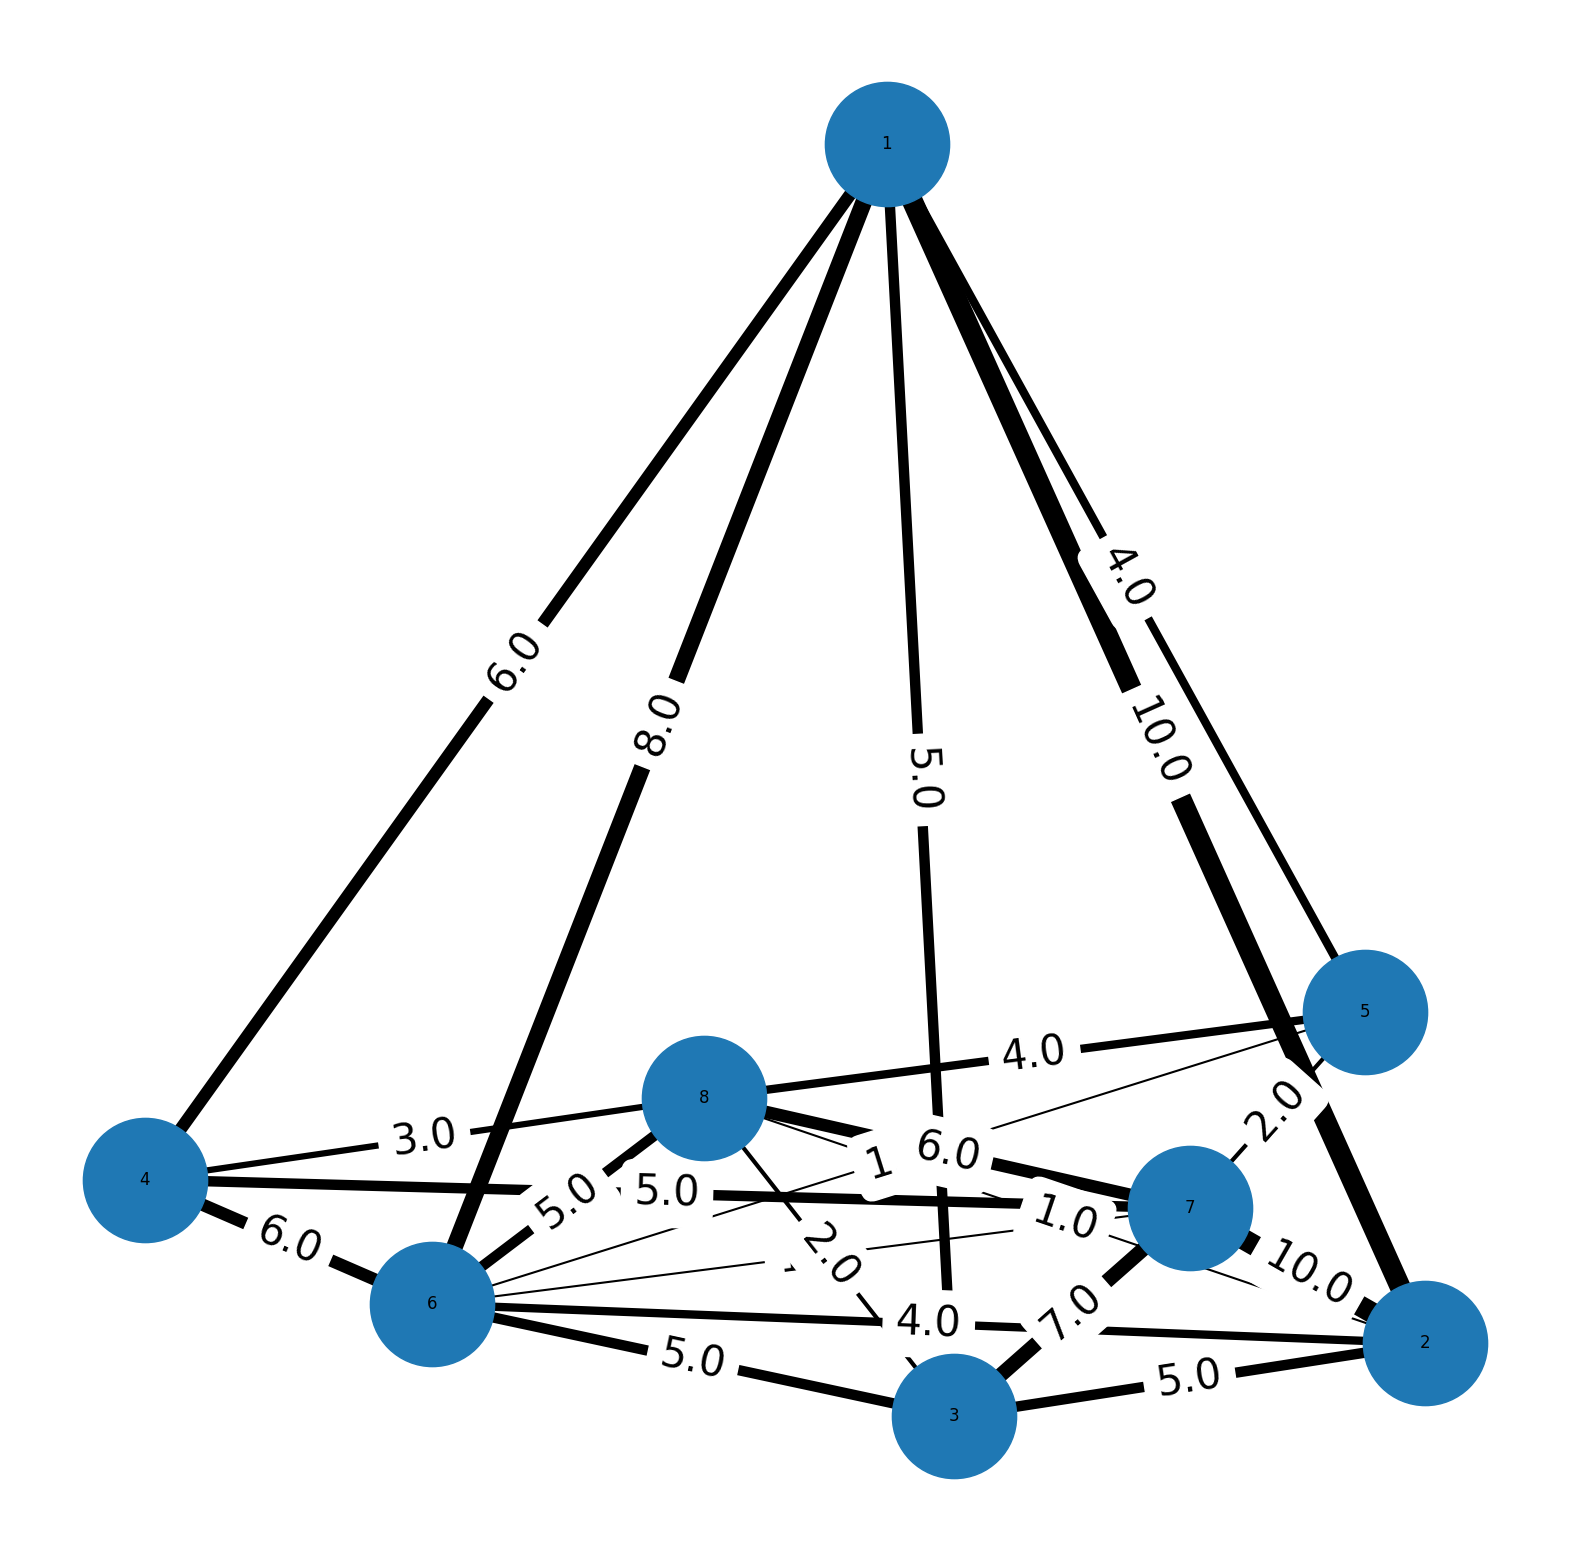

In [21]:


# 데이터를 기반으로 그래프에 노드와 엣지 추가

edge_weights={}

g = nx.Graph()


for node1, node2, score in lista:
    if score > 0:
        g.add_edge(node1, node2, weight=score)
# 그래프 시각화
plt.figure(figsize=(20, 20))

# 호감도에 따라 선의 두께 설정
edge_widths = [1.5 * g[u][v]['weight'] for u, v in g.edges()]
pos = nx.spring_layout(g, seed=1)
pos[1]=(0,5)


nx.draw_networkx(g, pos, with_labels=True, width=edge_widths,node_size=8000)
nx.draw_networkx_edge_labels(g, pos, edge_labels=dic,font_size=30)
plt.axis('off')
plt.show()

In [132]:
tuple(listb)

(('8', 1, 5.0),
 ('8', 2, 1.0),
 ('8', 3, 2.0),
 ('8', 4, 3.0),
 ('8', 5, 4.0),
 ('8', 6, 5.0),
 ('8', 7, 6.0))

In [212]:
dic

{(2, 1): 10.0,
 (3, 1): 5.0,
 (3, 2): 5.0,
 (4, 1): 6.0,
 (5, 1): 4.0,
 (6, 1): 8.0,
 (6, 2): 4.0,
 (6, 3): 5.0,
 (6, 4): 6.0,
 (6, 5): 1.0,
 (7, 2): 10.0,
 (7, 3): 7.0,
 (7, 4): 5.0,
 (7, 5): 2.0,
 (7, 6): 1.0,
 (8, 2): 1.0,
 (8, 3): 2.0,
 (8, 4): 3.0,
 (8, 5): 4.0,
 (8, 6): 5.0,
 (8, 7): 6.0}